# 1. Fourier Transform

The frequency components of an image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.


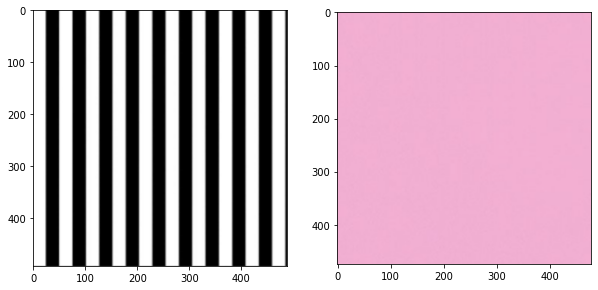

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the images
image_stripes = cv2.imread('images/stripes.png')
# Change color to RGB (from BGR)
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# Read in the images
image_solid = cv2.imread('images/pink_solid.png')
# Change color to RGB (from BGR)
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)


# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [4]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx


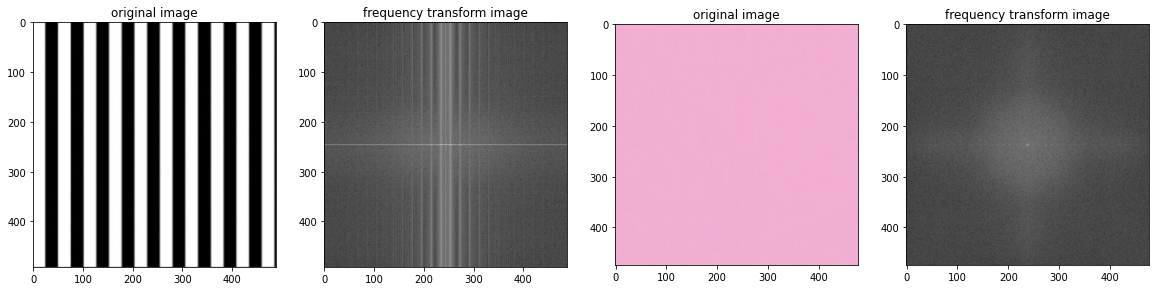

In [6]:
# Call the function on the normalized images
# and display the transforms
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')


Low frequencies are at the center of the frequency transform image.

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot).

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.

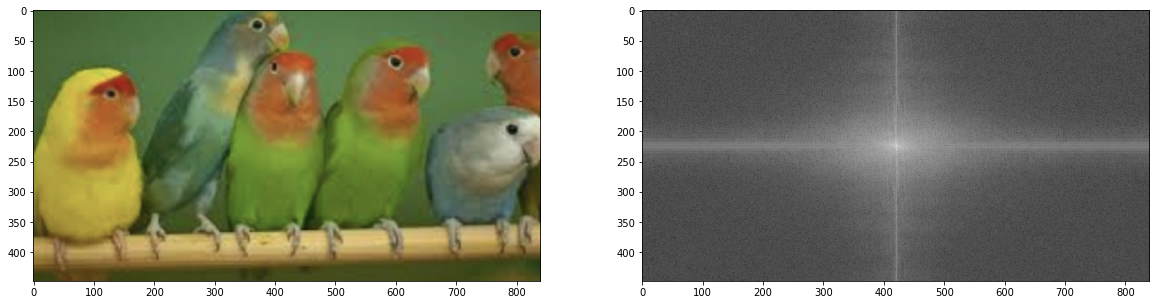

In [8]:
# Read in an image
image = cv2.imread('images/birds.png')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(f_image, cmap='gray')

Notice that this image has components of all frequencies. You can see a bright spot in the center of the transform image, which tells us that a large portion of the image is low-frequency; this makes sense since the body of the birds and background are solid colors. The transform image also tells us that there are **two** dominating directions for these frequencies; vertical edges (from the edges of birds) are represented by a horizontal line passing through the center of the frequency transform image, and horizontal edges (from the branch and tops of the birds' heads) are represented by a vertical line passing through the center.

# 2. Edge Detection, Sobel Filtering

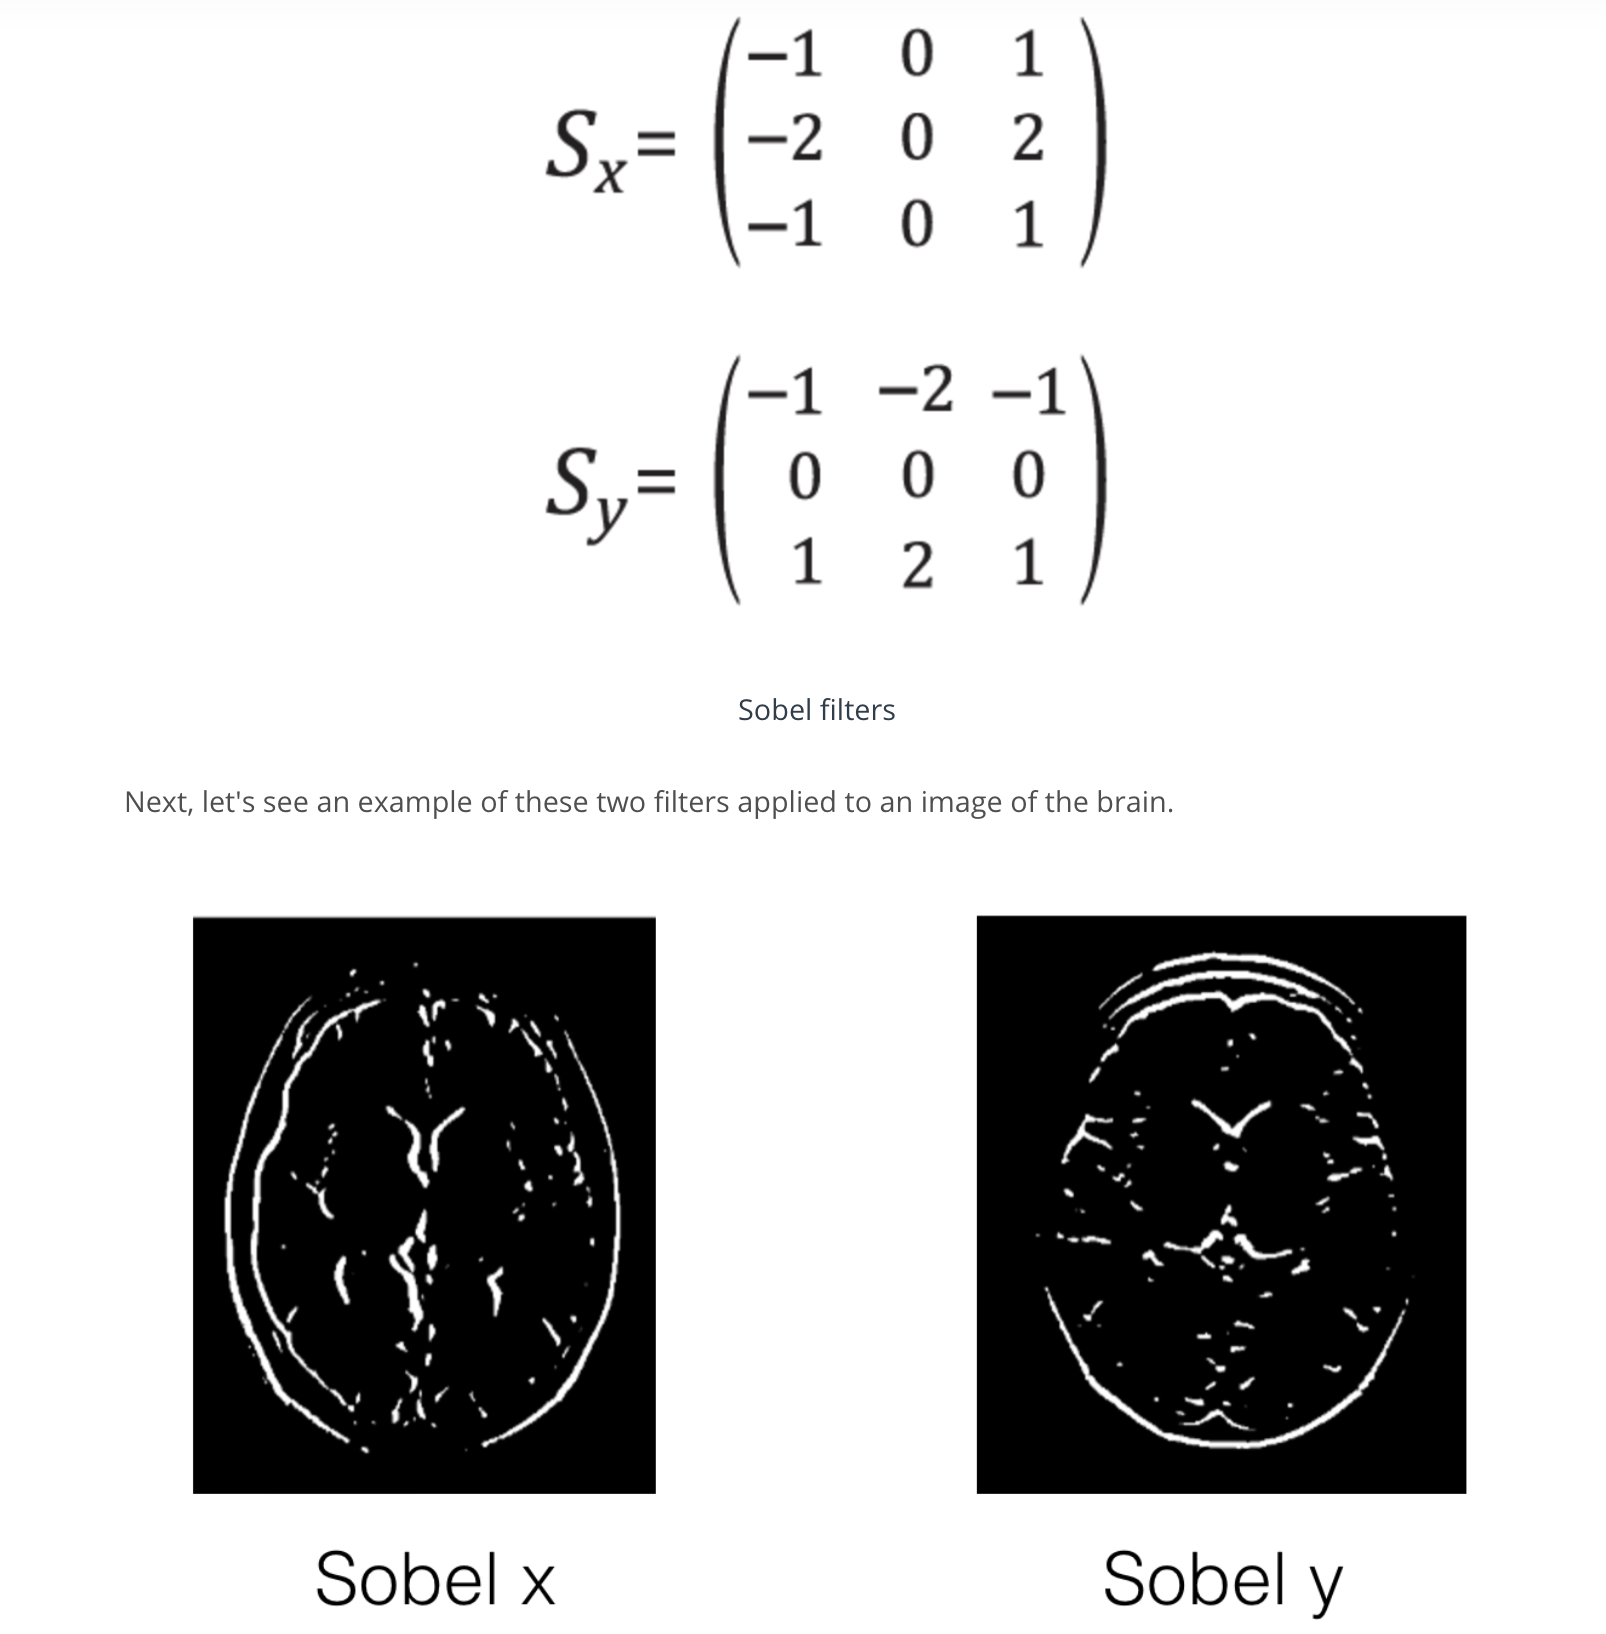

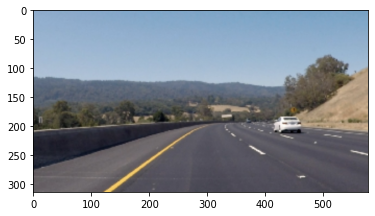

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image;
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

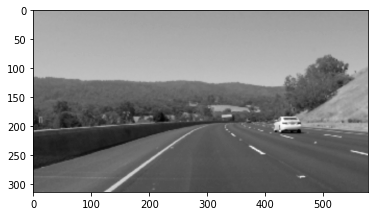

In [12]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

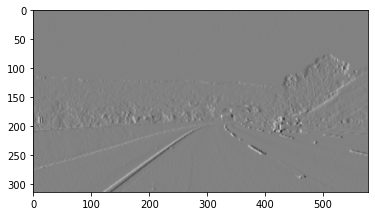

In [19]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

# 3. Gaussian Blur

https://www.youtube.com/watch?v=jy5Be9vf2rk

https://www.youtube.com/watch?v=1tlPonqIOrU

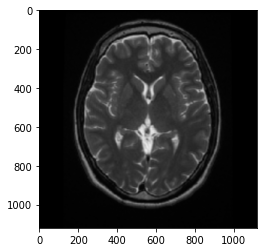

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/brain_mr.png')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

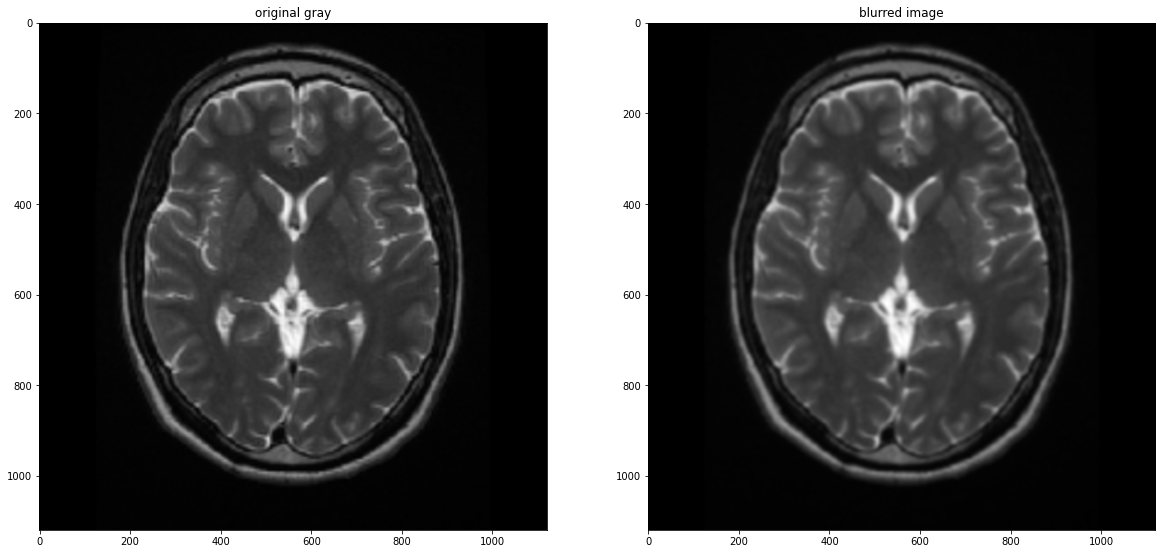

In [31]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

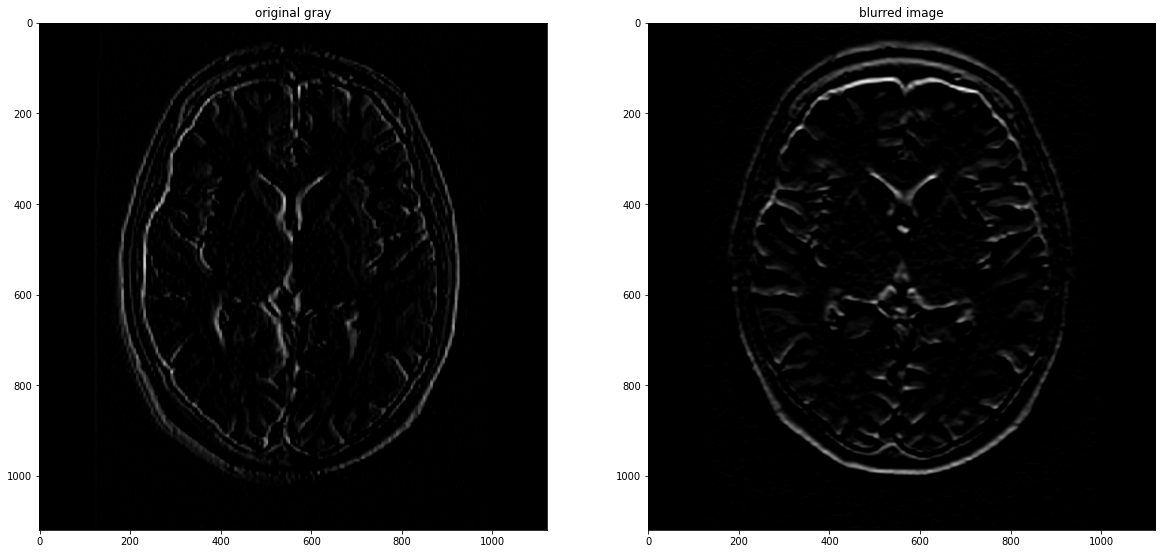

In [37]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

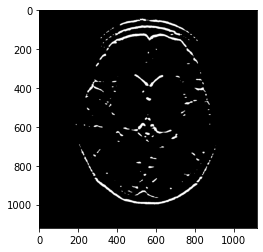

In [39]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold
retval, binary_image = cv2.threshold(filtered_blurred, 30, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')

# 4. High and low Pass filters

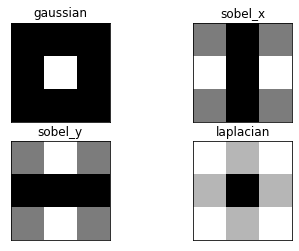

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Text(0.5, 1.0, 'laplacian')

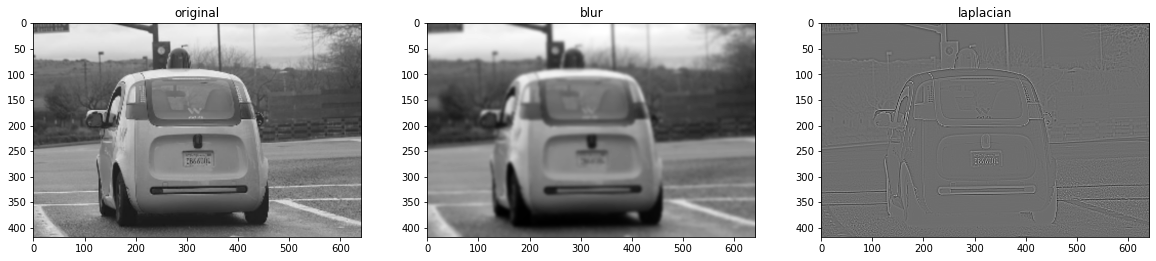

In [79]:
# Read in the image;
image = mpimg.imread('images/waymo_car.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blur = cv2.GaussianBlur(gray, (15, 15), -1)

laplacian = cv2.filter2D(gray, -1, laplacian)


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(image)
ax1.set_title("original")

ax2.imshow(blur,cmap='gray')
ax2.set_title("blur")

ax3.imshow(sobel,cmap='gray')
ax3.set_title("laplacian")

# 5. Convolutional Neural Networks

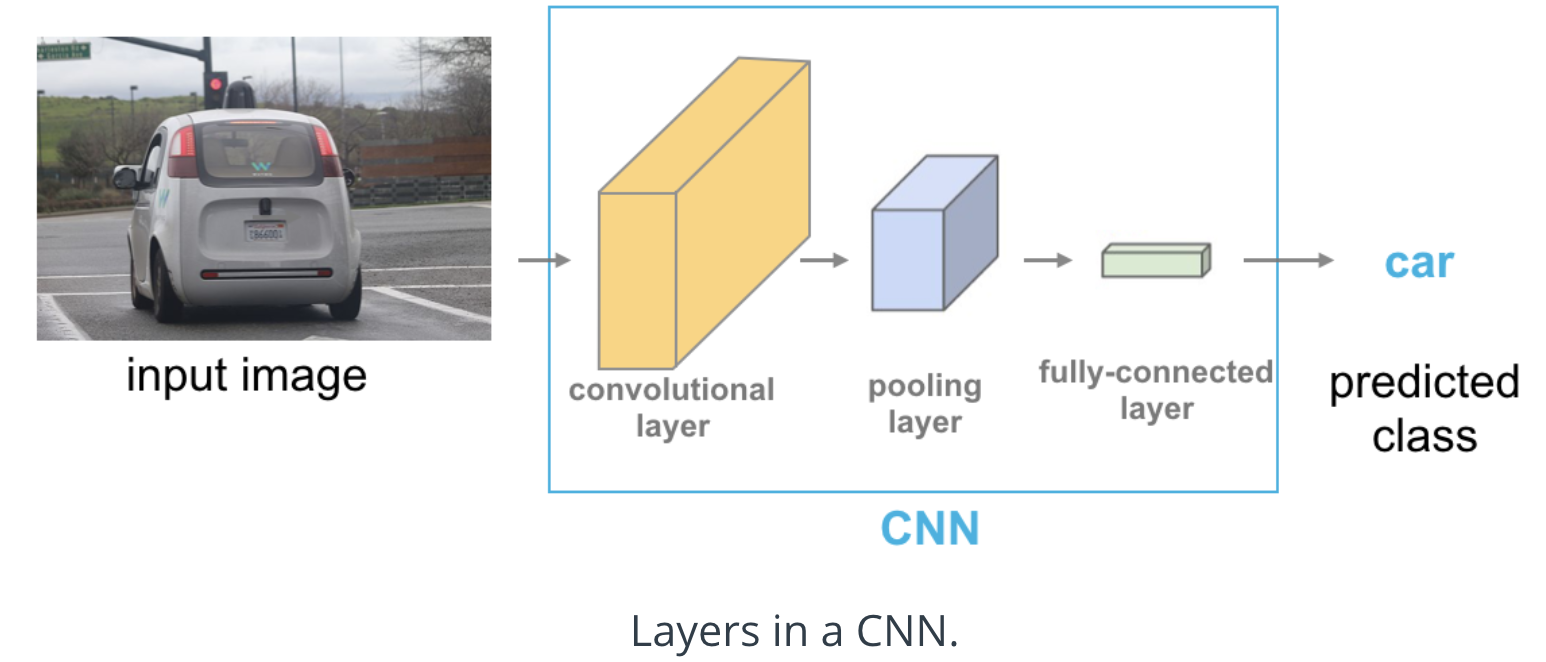

# 6. Canny Edge Detection

https://www.youtube.com/watch?v=Nm1H2xMMS3I

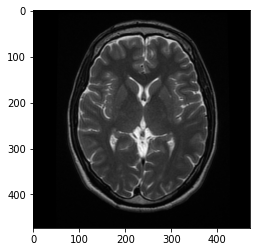

In [84]:
# Read in the image
image = cv2.imread('images/brain_mr.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

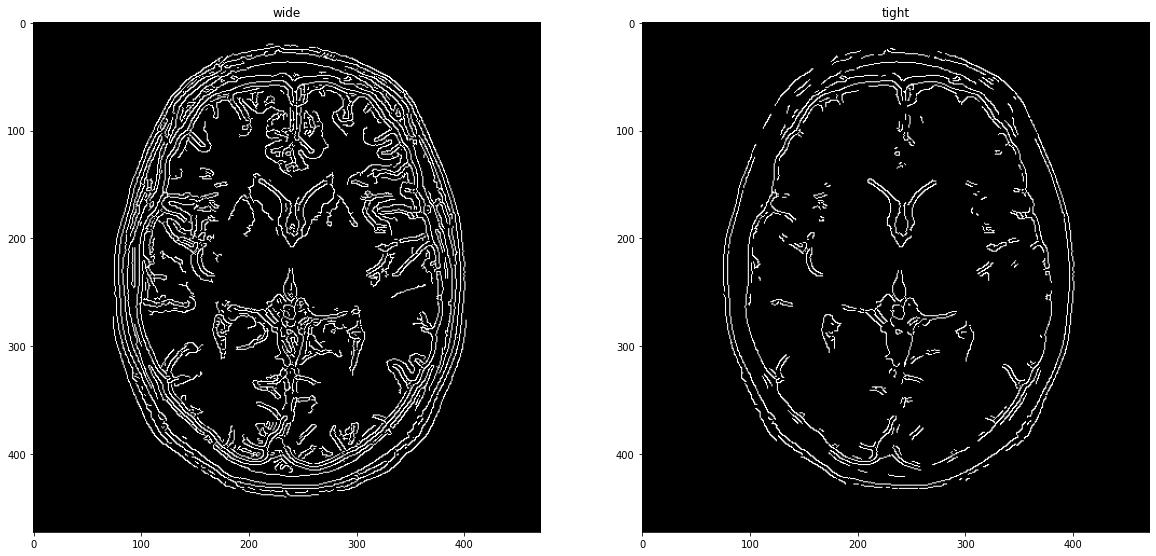

In [85]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

# 7. Hough Detection

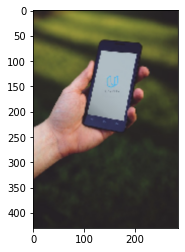

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

## Perform edge detection

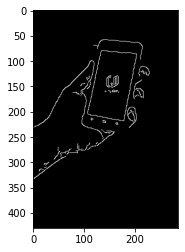

In [8]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

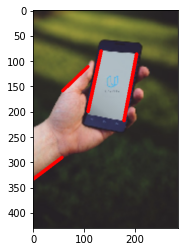

In [9]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

# 8. Hough Circle Detection

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


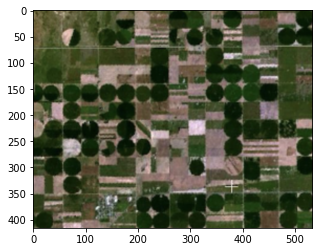

In [12]:
# Read in the image
image = cv2.imread('images/round_farms.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

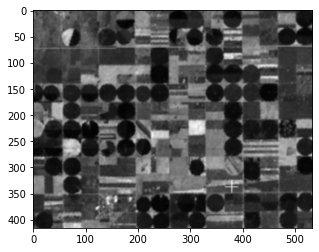

In [13]:
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')


Circles shape:  (1, 40, 3)


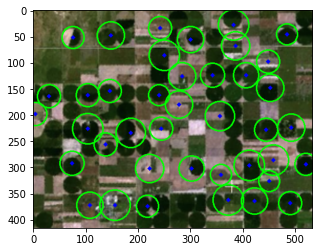

In [17]:
# for drawing circles on
circles_im = np.copy(image)

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=40,
                           param1=120,
                           param2=11,
                           minRadius=20,
                           maxRadius=30)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)
    

# 9. Face Detection

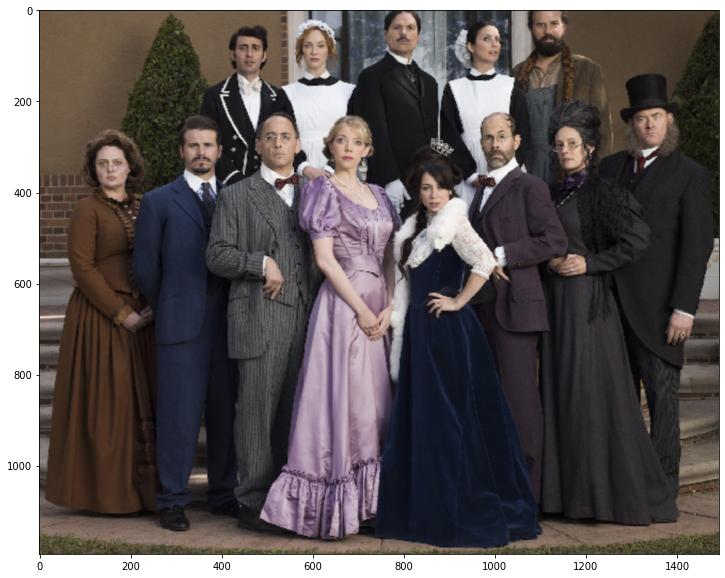

In [19]:
# load in color image for face detection
image = cv2.imread('images/multi_faces.jpg')

# convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(image)

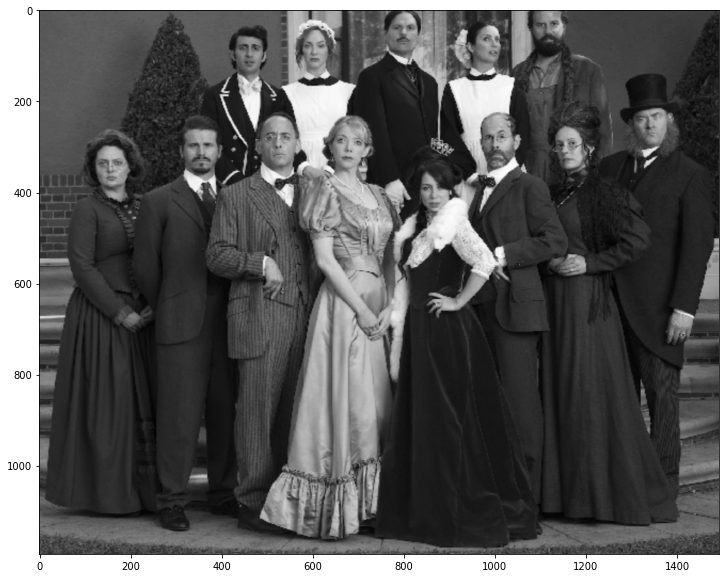

In [20]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')

In [56]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector/haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 3, 7)



In [57]:
# print out the detections found
print ('We found ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

We found 10 faces in this image
Their coordinates and lengths/widths are as follows
[[1079    5   72   72]
 [ 426   57   72   72]
 [ 569   51   72   72]
 [ 764   12   72   72]
 [ 957   36   72   72]
 [ 322  270   72   72]
 [1121  267   72   72]
 [ 120  308   72   72]
 [ 489  250   72   72]
 [ 965  251   72   72]]


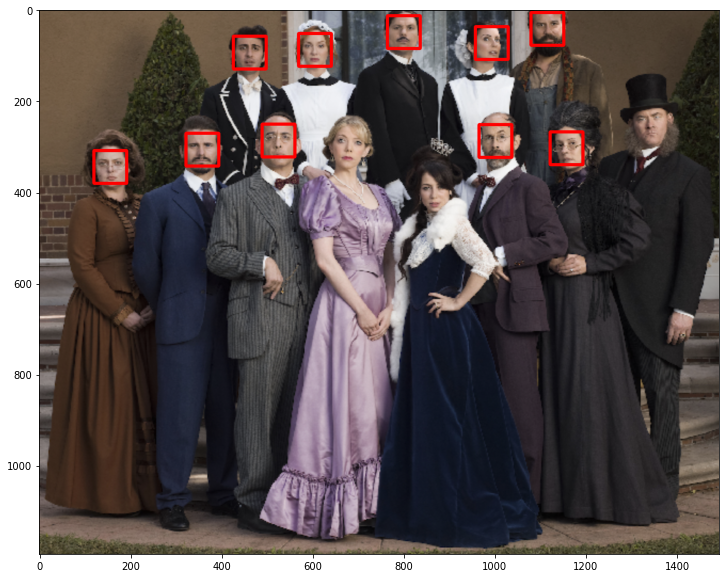

In [58]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, 
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)